# Cas Pratique : Visualisation de Données Capteurs Automobiles

## Objectifs
- Charger et explorer des données de capteurs réels
- Visualiser des images de caméras embarquées (RIIB dataset)
- Analyser des données de télémétrie simulées
- Comprendre les défis du Big Data en pratique

## Dataset RIIB (Robot for Interaction in Buildings)
Ce dataset contient des images de caméras embarquées utilisées pour la navigation autonome.

## 1. Configuration et imports

In [1]:
# Imports nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import glob
import os
from pathlib import Path

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Imports réussis")

✅ Imports réussis


## 2. Exploration des images de caméras RIIB

Les images PGM (Portable Gray Map) sont des images en niveaux de gris, format couramment utilisé en robotique.

In [ ]:
# Chemin vers les données RIIB
riib_path = Path('..data/riib/additional/')

# Lister les dossiers ("bags" = sessions d'enregistrement)
bags = sorted([d for d in riib_path.iterdir() if d.is_dir()])

print(f"📁 Nombre de sessions d'enregistrement : {len(bags)}")
print(f"\n🎯 Exemple de sessions :")
for bag in bags[:5]:
    images = list(bag.glob('*.pgm'))
    print(f"  - {bag.name}: {len(images)} images")

### Visualisation d'images de caméras

Visualisons quelques images pour comprendre ce que "voient" les capteurs.

In [3]:
# Sélectionner une session
selected_bag = bags[1]  # Deuxième session
images_paths = sorted(list(selected_bag.glob('*.pgm')))[:20]  # 20 premières images

print(f"📷 Session sélectionnée : {selected_bag.name}")
print(f"📸 Nombre d'images à visualiser : {len(images_paths)}")

📷 Session sélectionnée : 2015-10-05-10-55-33_bag
📸 Nombre d'images à visualiser : 20


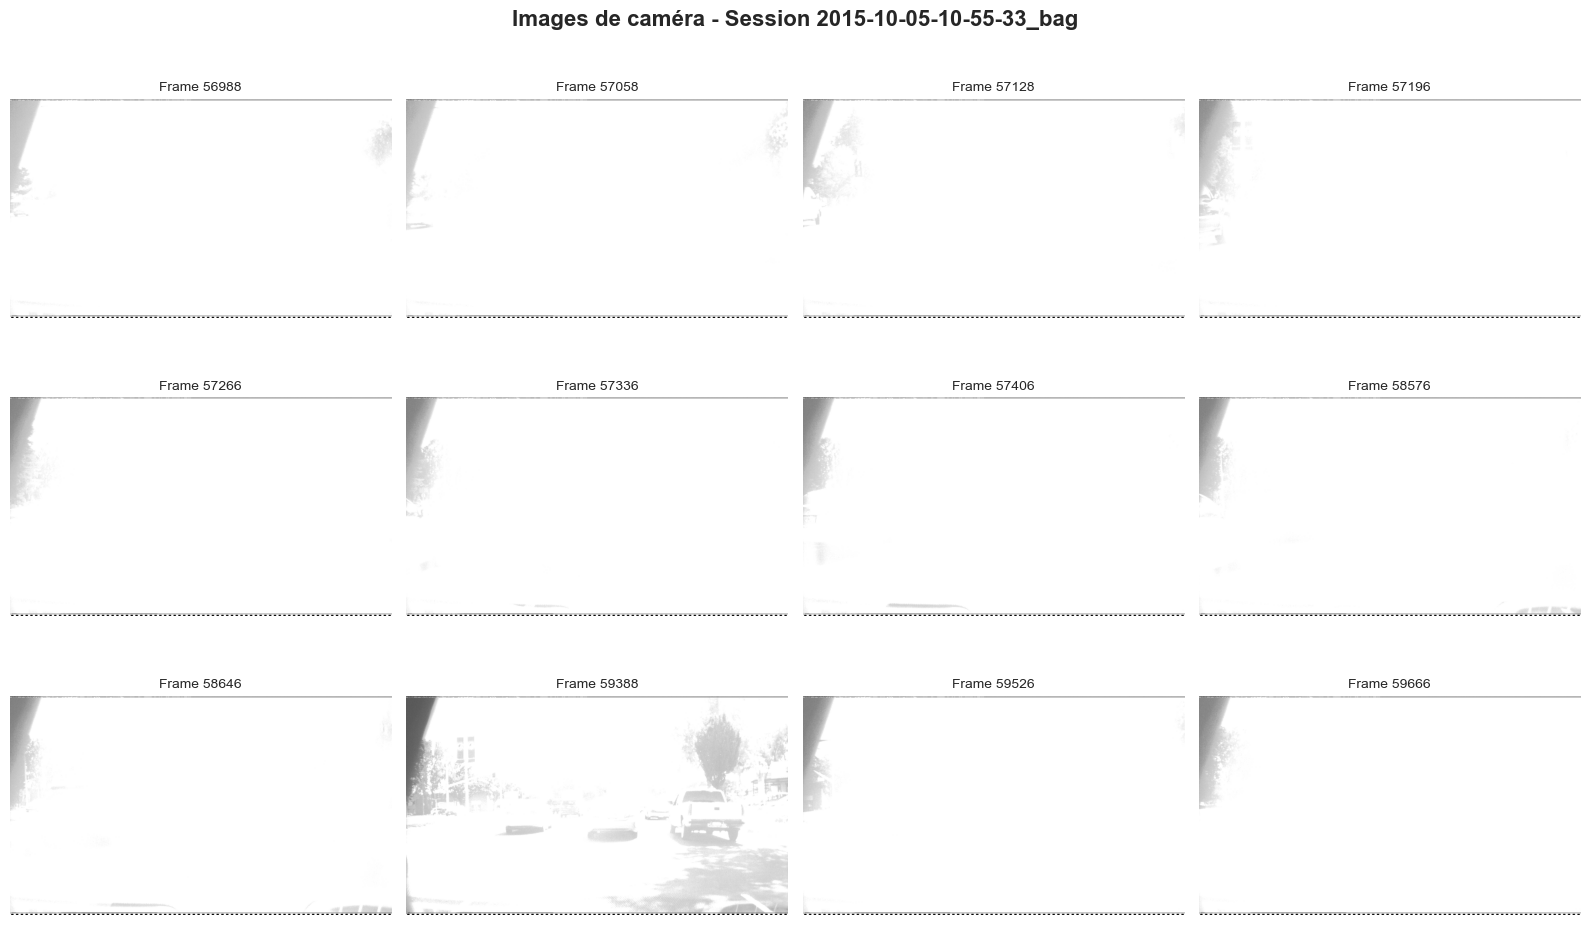


💡 Observation : Ces images montrent l'environnement tel que perçu par le robot/véhicule.
   En automobile, cela pourrait être utilisé pour : détection d'obstacles, lecture de panneaux, suivi de voie...


In [4]:
# Afficher une grille de 12 images
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
fig.suptitle(f'Images de caméra - Session {selected_bag.name}', fontsize=16, fontweight='bold')

for idx, (ax, img_path) in enumerate(zip(axes.flat, images_paths[:12])):
    # Charger l'image
    img = Image.open(img_path)
    
    # Afficher
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Frame {img_path.stem}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("\n💡 Observation : Ces images montrent l'environnement tel que perçu par le robot/véhicule.")
print("   En automobile, cela pourrait être utilisé pour : détection d'obstacles, lecture de panneaux, suivi de voie...")

### Analyse statistique des images

In [5]:
# Analyser les caractéristiques des images
image_stats = []

for img_path in images_paths[:50]:  # Analyser 50 images
    img = Image.open(img_path)
    img_array = np.array(img)
    
    image_stats.append({
        'frame': int(img_path.stem),
        'width': img_array.shape[1],
        'height': img_array.shape[0],
        'mean_intensity': img_array.mean(),
        'std_intensity': img_array.std(),
        'min_intensity': img_array.min(),
        'max_intensity': img_array.max()
    })

# Créer un DataFrame
df_images = pd.DataFrame(image_stats)
print("📊 Statistiques des images :")
display(df_images.head(10))
print(f"\n📏 Résolution standard : {df_images['width'].iloc[0]} x {df_images['height'].iloc[0]} pixels")

📊 Statistiques des images :


,frame,width,height,mean_intensity,std_intensity,min_intensity,max_intensity
0,56988,1280,736,1385.664365,758.499234,0,4092
1,57058,1280,736,1278.740609,743.549721,0,4092
2,57128,1280,736,1338.244227,755.478335,0,4092
3,57196,1280,736,1348.431263,758.856695,0,4092
4,57266,1280,736,1355.774754,752.287386,0,4092
5,57336,1280,736,1288.991649,759.614127,0,4092
6,57406,1280,736,1267.976968,768.015024,0,4092
7,58576,1280,736,1205.181402,775.534881,0,4092
8,58646,1280,736,1191.452142,774.754157,0,4092
9,59388,1280,736,1119.498032,834.339118,0,4092



📏 Résolution standard : 1280 x 736 pixels


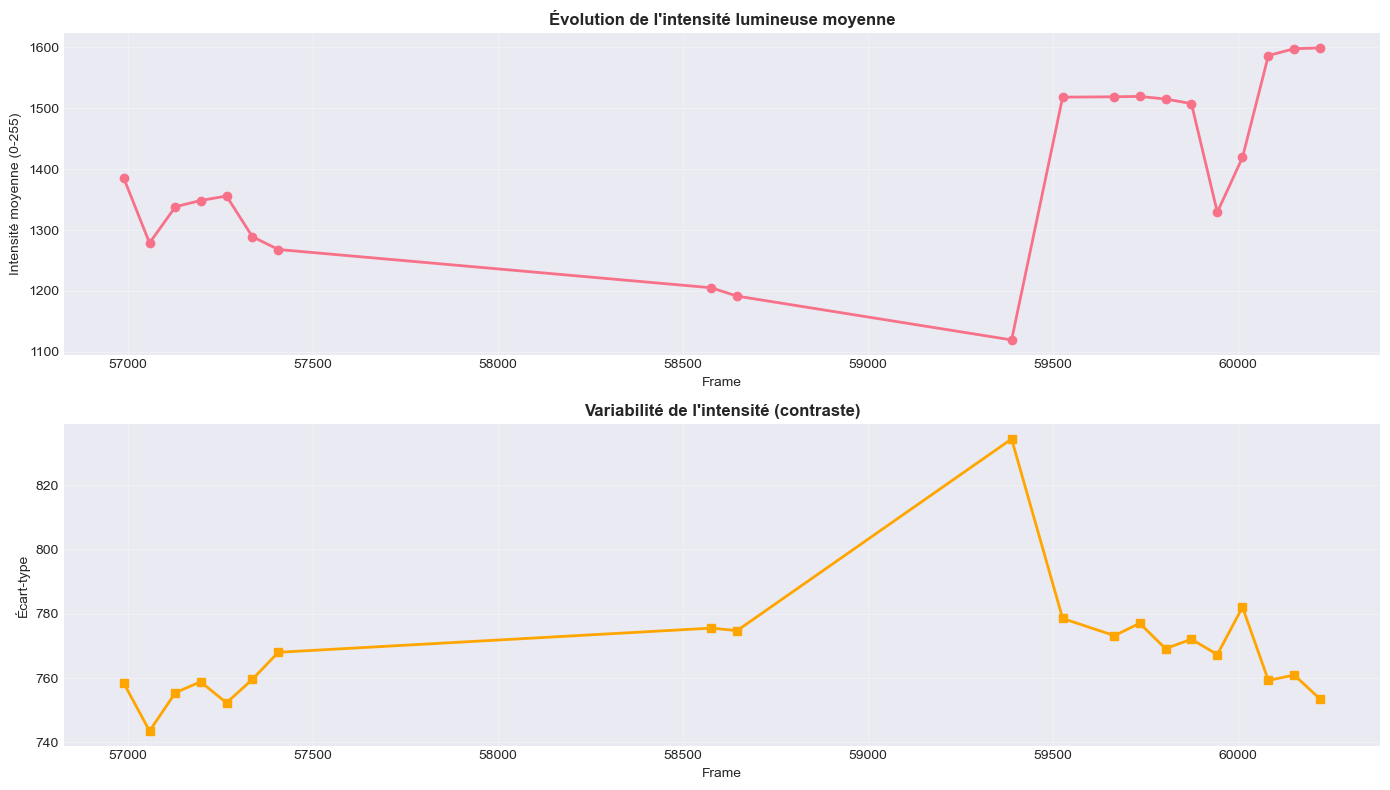


💡 Interprétation :
   - Intensité moyenne : Indique la luminosité générale (peut varier avec les conditions d'éclairage)
   - Variabilité : Indique le contraste (élevé = beaucoup de détails, faible = image homogène)


In [6]:
# Visualiser l'évolution de l'intensité lumineuse
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Intensité moyenne
axes[0].plot(df_images['frame'], df_images['mean_intensity'], marker='o', linewidth=2)
axes[0].set_title('Évolution de l\'intensité lumineuse moyenne', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Frame')
axes[0].set_ylabel('Intensité moyenne (0-255)')
axes[0].grid(True, alpha=0.3)

# Variabilité (écart-type)
axes[1].plot(df_images['frame'], df_images['std_intensity'], marker='s', color='orange', linewidth=2)
axes[1].set_title('Variabilité de l\'intensité (contraste)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Frame')
axes[1].set_ylabel('Écart-type')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Interprétation :")
print("   - Intensité moyenne : Indique la luminosité générale (peut varier avec les conditions d'éclairage)")
print("   - Variabilité : Indique le contraste (élevé = beaucoup de détails, faible = image homogène)")

## 3. Simulation de données de télémétrie automobile

Simulons des données de capteurs automobiles pour illustrer les concepts de Big Data.

In [7]:
# Paramètres de simulation
np.random.seed(42)

# Nombre de véhicules et durée
n_vehicles = 1000
n_days = 30
records_per_day = 100  # 100 mesures par jour par véhicule

total_records = n_vehicles * n_days * records_per_day

print(f"🚗 Simulation de {n_vehicles:,} véhicules")
print(f"📅 Période : {n_days} jours")
print(f"📊 Total d'enregistrements : {total_records:,}")
print(f"\n💾 Volume estimé : ~{total_records * 100 / 1e6:.1f} Mo (si 100 bytes/enregistrement)")

🚗 Simulation de 1,000 véhicules
📅 Période : 30 jours
📊 Total d'enregistrements : 3,000,000

💾 Volume estimé : ~300.0 Mo (si 100 bytes/enregistrement)


### Génération des données

In [8]:
# Générer les données de télémétrie
print("⏳ Génération des données en cours...")

data = []

for vehicle_id in range(1, n_vehicles + 1):
    # Caractéristiques du véhicule (constantes)
    vehicle_age = np.random.randint(1, 15)  # 1 à 15 ans
    vehicle_model = np.random.choice(['Clio', 'Peugeot 208', 'Citroën C3', 'Renault Mégane'])
    base_mileage = vehicle_age * np.random.randint(10000, 25000)
    
    for day in range(n_days):
        # Kilométrage journalier
        daily_km = np.random.randint(20, 150)
        
        for record in range(records_per_day):
            # Température moteur (dépend de l'âge et du kilométrage)
            base_temp = 85 + vehicle_age * 0.5  # Véhicules anciens chauffent plus
            engine_temp = base_temp + np.random.normal(0, 5)
            
            # Charge CPU du calculateur (0-100%)
            cpu_load = np.random.normal(45, 15)
            cpu_load = np.clip(cpu_load, 0, 100)
            
            # Erreurs CAN bus (suivent une loi de Poisson, plus fréquentes pour vieux véhicules)
            lambda_errors = 0.1 * vehicle_age
            can_errors = np.random.poisson(lambda_errors)
            
            # Vitesse
            speed = np.random.choice([0, 30, 50, 70, 90, 110, 130], p=[0.1, 0.2, 0.2, 0.2, 0.15, 0.1, 0.05])
            
            data.append({
                'vehicle_id': vehicle_id,
                'vehicle_model': vehicle_model,
                'vehicle_age': vehicle_age,
                'day': day,
                'record': record,
                'mileage': base_mileage + day * daily_km + record,
                'engine_temp': engine_temp,
                'cpu_load': cpu_load,
                'can_errors': can_errors,
                'speed': speed
            })

# Créer le DataFrame
df_telemetry = pd.DataFrame(data)

print(f"✅ {len(df_telemetry):,} enregistrements générés")
print(f"\n📋 Aperçu des données :")
display(df_telemetry.head(10))

⏳ Génération des données en cours...
✅ 3,000,000 enregistrements générés

📋 Aperçu des données :


,vehicle_id,vehicle_model,vehicle_age,day,record,mileage,engine_temp,cpu_load,can_errors,speed
0,1,Renault Mégane,7,0,0,76020,91.738443,67.845448,0,30
1,1,Renault Mégane,7,0,1,76021,96.396064,56.511521,0,130
2,1,Renault Mégane,7,0,2,76022,86.152628,53.138401,0,30
3,1,Renault Mégane,7,0,3,76023,89.709811,16.300796,0,30
4,1,Renault Mégane,7,0,4,76024,83.435844,49.713710,0,50
5,1,Renault Mégane,7,0,5,76025,95.828244,41.613355,0,70
6,1,Renault Mégane,7,0,6,76026,85.778086,46.663839,1,0
7,1,Renault Mégane,7,0,7,76027,85.498731,59.211597,0,70
8,1,Renault Mégane,7,0,8,76028,83.392239,42.573669,0,0
9,1,Renault Mégane,7,0,9,76029,87.352748,50.840234,1,70


### Analyse exploratoire des données (EDA)

In [9]:
# Statistiques descriptives
print("📊 Statistiques descriptives :")
display(df_telemetry[['engine_temp', 'cpu_load', 'can_errors', 'speed']].describe())

📊 Statistiques descriptives :


,engine_temp,cpu_load,can_errors,speed
count,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06
mean,8.877422e+01,4.500490e+01,7.561177e-01,6.099467e+01
std,5.395098e+00,1.497204e+01,9.585524e-01,3.478171e+01
min,6.293349e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.512568e+01,3.488743e+01,0.000000e+00,3.000000e+01
50%,8.877082e+01,4.499554e+01,0.000000e+00,7.000000e+01
75%,9.242154e+01,5.511702e+01,1.000000e+00,9.000000e+01
max,1.150265e+02,1.000000e+02,1.000000e+01,1.300000e+02


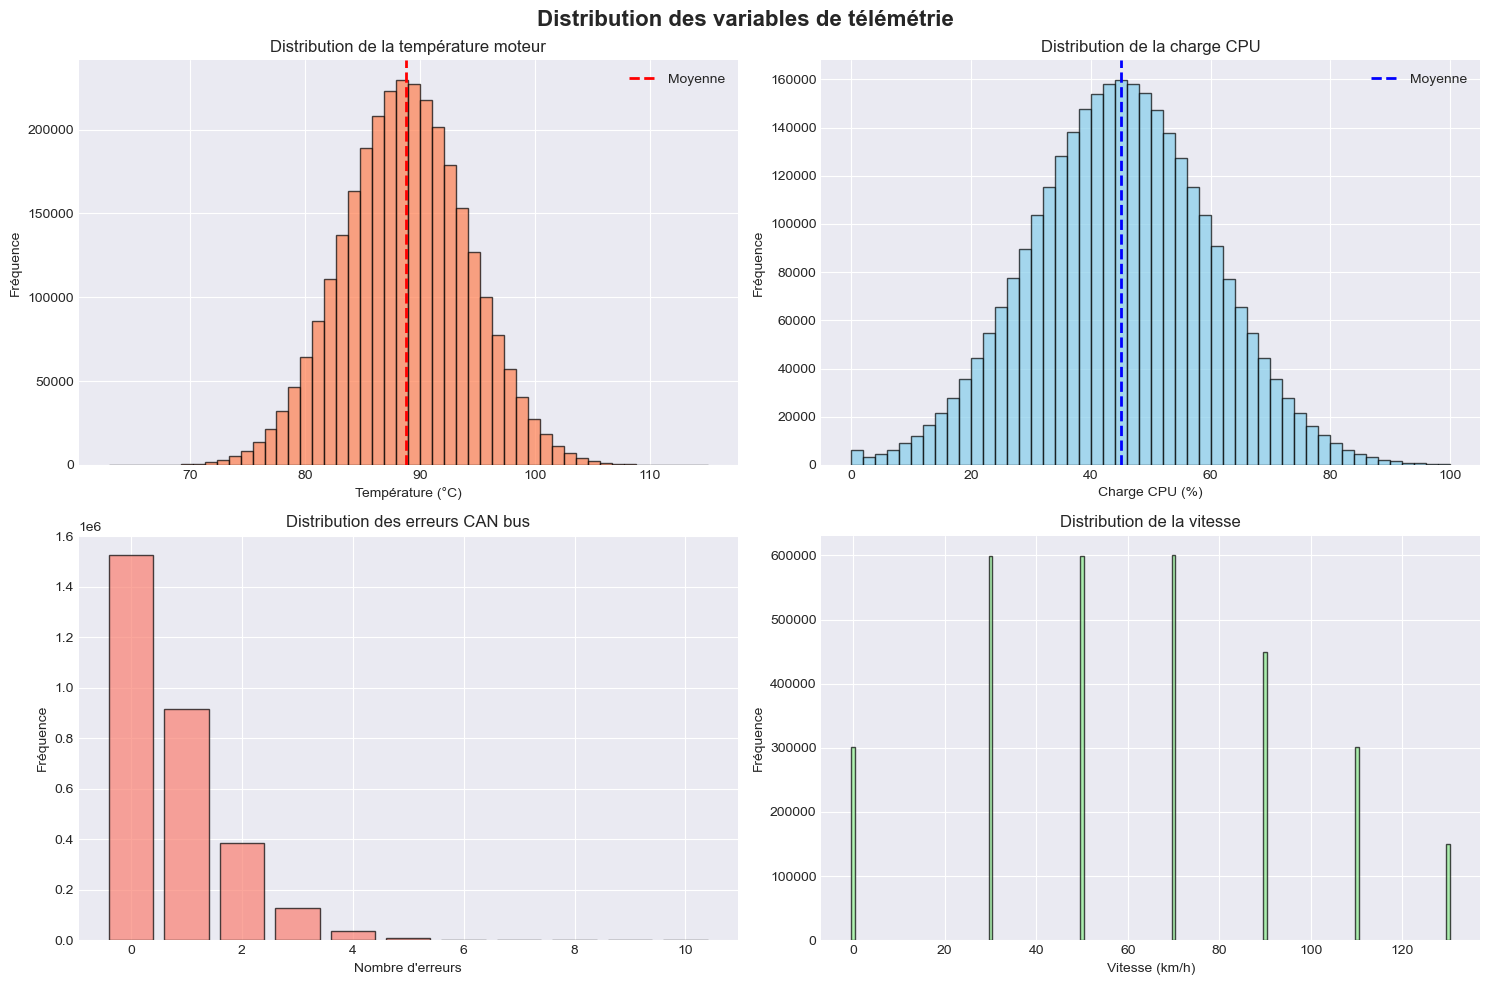

In [10]:
# Distribution des variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution des variables de télémétrie', fontsize=16, fontweight='bold')

# Température moteur
axes[0, 0].hist(df_telemetry['engine_temp'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution de la température moteur')
axes[0, 0].set_xlabel('Température (°C)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].axvline(df_telemetry['engine_temp'].mean(), color='red', linestyle='--', linewidth=2, label='Moyenne')
axes[0, 0].legend()

# Charge CPU
axes[0, 1].hist(df_telemetry['cpu_load'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution de la charge CPU')
axes[0, 1].set_xlabel('Charge CPU (%)')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].axvline(df_telemetry['cpu_load'].mean(), color='blue', linestyle='--', linewidth=2, label='Moyenne')
axes[0, 1].legend()

# Erreurs CAN
error_counts = df_telemetry['can_errors'].value_counts().sort_index()
axes[1, 0].bar(error_counts.index, error_counts.values, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution des erreurs CAN bus')
axes[1, 0].set_xlabel('Nombre d\'erreurs')
axes[1, 0].set_ylabel('Fréquence')

# Vitesse
speed_counts = df_telemetry['speed'].value_counts().sort_index()
axes[1, 1].bar(speed_counts.index, speed_counts.values, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution de la vitesse')
axes[1, 1].set_xlabel('Vitesse (km/h)')
axes[1, 1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

### Relation entre âge du véhicule et température moteur

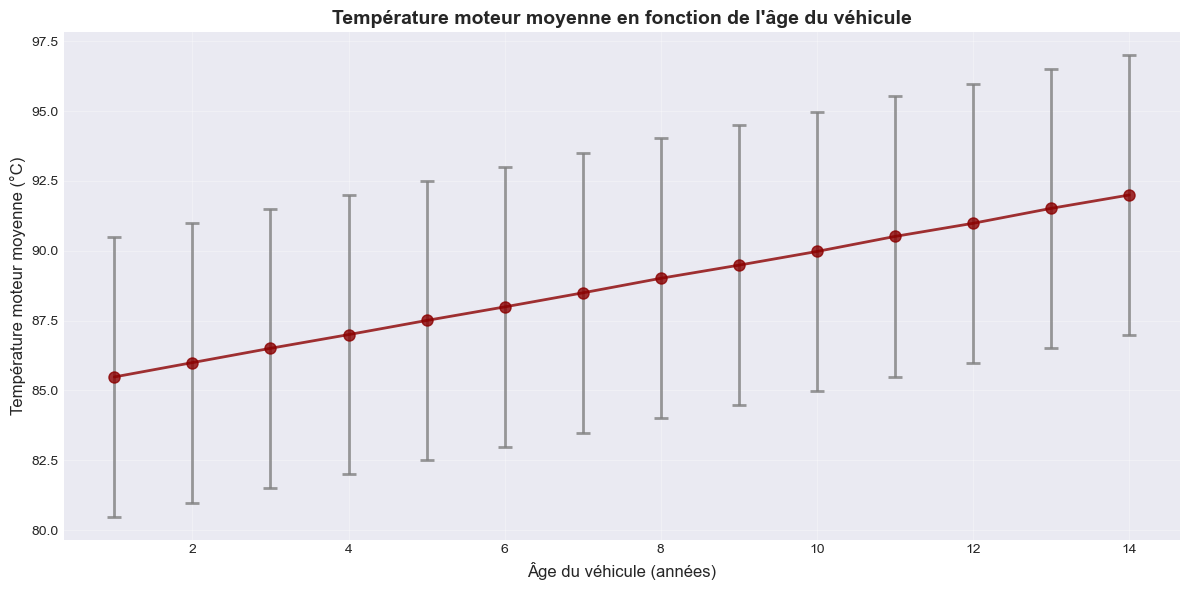


💡 Observation : La température moteur augmente avec l'âge du véhicule.
   Cela pourrait être un indicateur de maintenance nécessaire (pompe à eau, thermostat, etc.)


In [11]:
# Agrégation par âge de véhicule
temp_by_age = df_telemetry.groupby('vehicle_age')['engine_temp'].agg(['mean', 'std', 'count']).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

ax.errorbar(temp_by_age['vehicle_age'], temp_by_age['mean'], 
            yerr=temp_by_age['std'], 
            marker='o', markersize=8, linewidth=2, capsize=5, capthick=2,
            color='darkred', ecolor='gray', alpha=0.8)

ax.set_title('Température moteur moyenne en fonction de l\'âge du véhicule', fontsize=14, fontweight='bold')
ax.set_xlabel('Âge du véhicule (années)', fontsize=12)
ax.set_ylabel('Température moteur moyenne (°C)', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Observation : La température moteur augmente avec l'âge du véhicule.")
print("   Cela pourrait être un indicateur de maintenance nécessaire (pompe à eau, thermostat, etc.)")

### Détection d'anomalies : Températures anormalement élevées

In [12]:
# Définir un seuil d'anomalie (par exemple, > 105°C)
temp_threshold = 105

anomalies = df_telemetry[df_telemetry['engine_temp'] > temp_threshold]

print(f"🚨 Nombre d'anomalies détectées : {len(anomalies):,} ({len(anomalies)/len(df_telemetry)*100:.2f}% des mesures)")
print(f"\n🔍 Véhicules concernés : {anomalies['vehicle_id'].nunique()}")
print(f"\n📊 Top 5 des véhicules avec le plus d'anomalies :")
top_anomalies = anomalies['vehicle_id'].value_counts().head(5)
for vehicle, count in top_anomalies.items():
    vehicle_age = df_telemetry[df_telemetry['vehicle_id'] == vehicle]['vehicle_age'].iloc[0]
    print(f"   Véhicule {vehicle} (âge: {vehicle_age} ans) : {count} anomalies")

🚨 Nombre d'anomalies détectées : 3,656 (0.12% des mesures)

🔍 Véhicules concernés : 706

📊 Top 5 des véhicules avec le plus d'anomalies :
   Véhicule 794 (âge: 14 ans) : 23 anomalies
   Véhicule 531 (âge: 14 ans) : 21 anomalies
   Véhicule 470 (âge: 14 ans) : 21 anomalies
   Véhicule 807 (âge: 14 ans) : 21 anomalies
   Véhicule 333 (âge: 12 ans) : 20 anomalies


### Analyse par modèle de véhicule

In [13]:
# Comparaison entre modèles
model_stats = df_telemetry.groupby('vehicle_model').agg({
    'engine_temp': ['mean', 'std'],
    'cpu_load': ['mean', 'std'],
    'can_errors': ['sum', 'mean'],
    'vehicle_id': 'nunique'
}).round(2)

model_stats.columns = ['Temp_moyenne', 'Temp_std', 'CPU_moyen', 'CPU_std', 'Total_erreurs', 'Erreurs_moyenne', 'Nb_vehicules']
model_stats = model_stats.reset_index()

print("📊 Comparaison par modèle de véhicule :")
display(model_stats)

📊 Comparaison par modèle de véhicule :


,vehicle_model,Temp_moyenne,Temp_std,CPU_moyen,CPU_std,Total_erreurs,Erreurs_moyenne,Nb_vehicules
0,Citroën C3,88.83,5.38,45.04,14.98,594450,0.77,259
1,Clio,88.71,5.42,44.98,14.96,556858,0.75,249
2,Peugeot 208,88.85,5.36,44.99,14.96,563090,0.77,244
3,Renault Mégane,88.71,5.42,45.01,14.98,553955,0.74,248


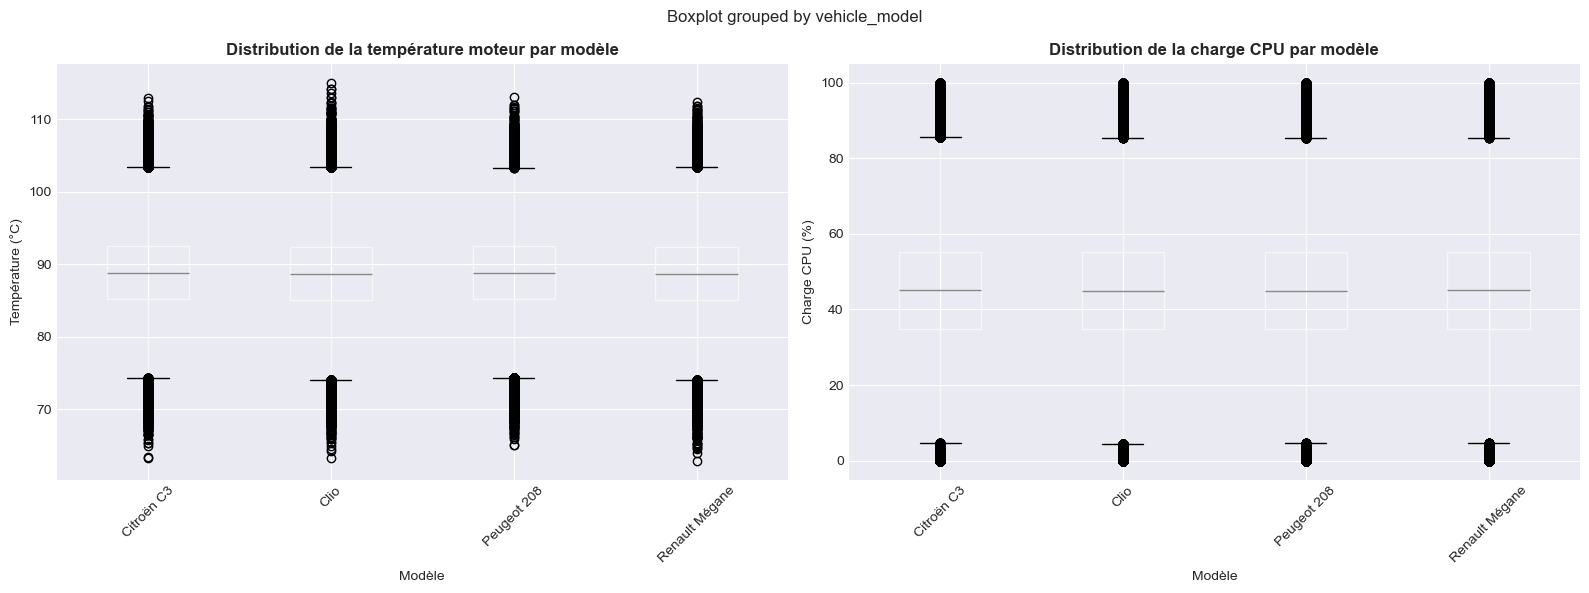

In [14]:
# Visualisation : Boxplot par modèle
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Température par modèle
df_telemetry.boxplot(column='engine_temp', by='vehicle_model', ax=axes[0])
axes[0].set_title('Distribution de la température moteur par modèle', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Modèle')
axes[0].set_ylabel('Température (°C)')
plt.sca(axes[0])
plt.xticks(rotation=45)

# Charge CPU par modèle
df_telemetry.boxplot(column='cpu_load', by='vehicle_model', ax=axes[1])
axes[1].set_title('Distribution de la charge CPU par modèle', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Modèle')
axes[1].set_ylabel('Charge CPU (%)')
plt.sca(axes[1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 4. Simulation Big Data : Évolution temporelle

Analysons l'évolution des métriques sur les 30 jours.

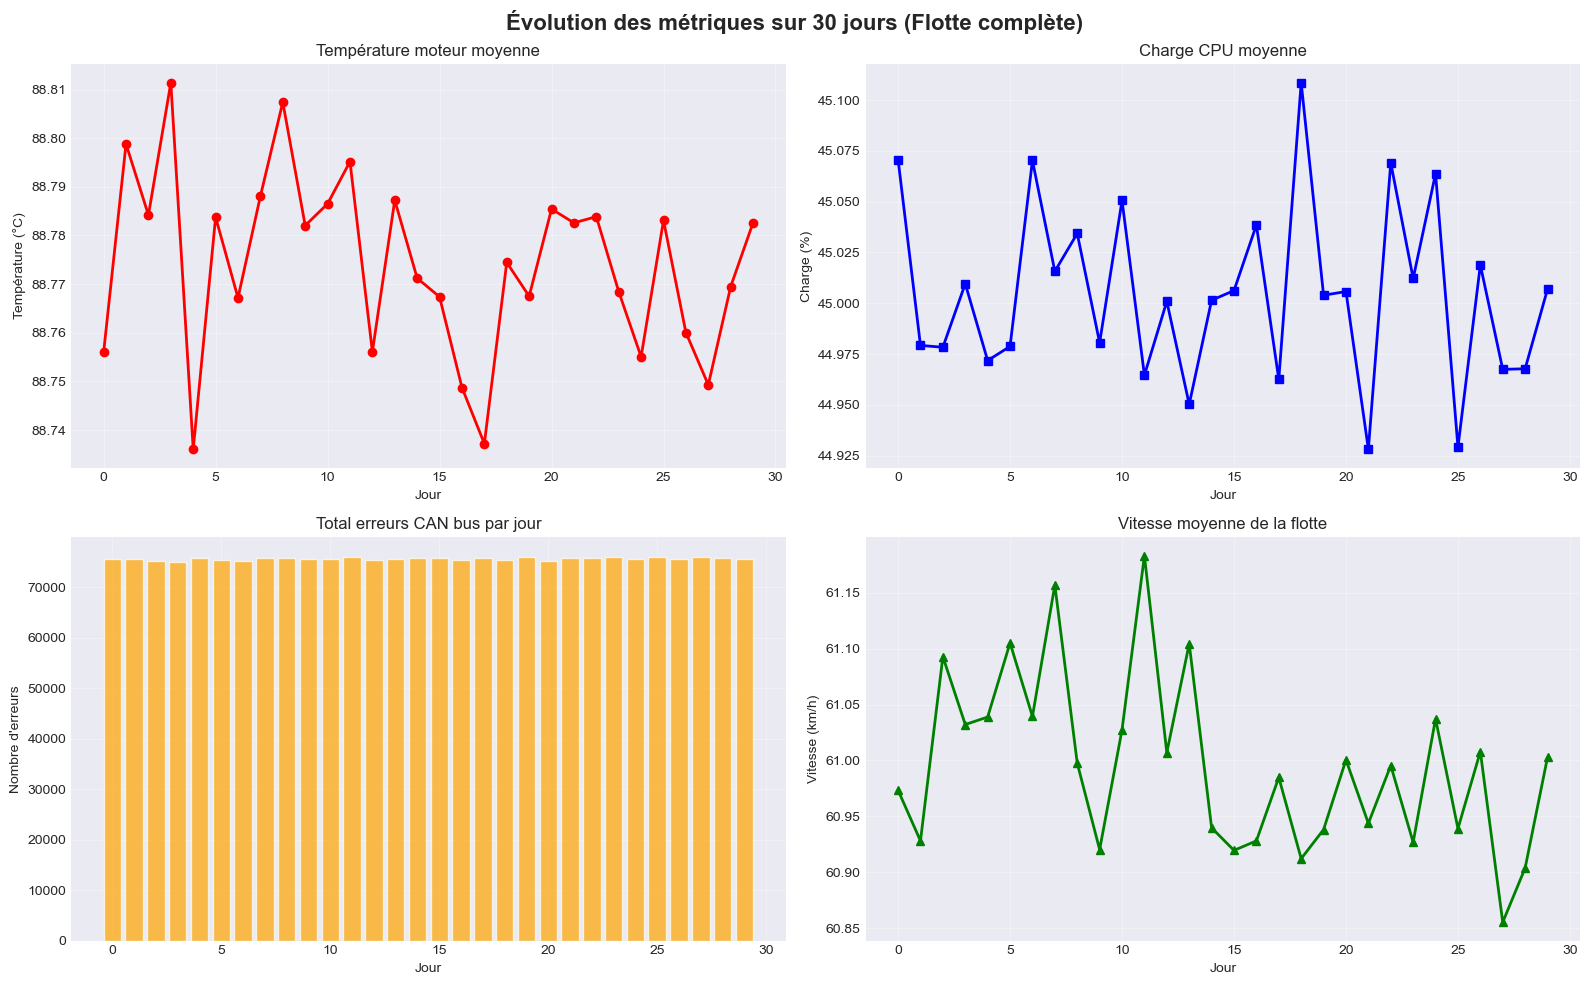

In [15]:
# Agrégation quotidienne
daily_stats = df_telemetry.groupby('day').agg({
    'engine_temp': 'mean',
    'cpu_load': 'mean',
    'can_errors': 'sum',
    'speed': 'mean'
}).reset_index()

# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Évolution des métriques sur 30 jours (Flotte complète)', fontsize=16, fontweight='bold')

# Température
axes[0, 0].plot(daily_stats['day'], daily_stats['engine_temp'], marker='o', linewidth=2, color='red')
axes[0, 0].set_title('Température moteur moyenne')
axes[0, 0].set_xlabel('Jour')
axes[0, 0].set_ylabel('Température (°C)')
axes[0, 0].grid(True, alpha=0.3)

# CPU
axes[0, 1].plot(daily_stats['day'], daily_stats['cpu_load'], marker='s', linewidth=2, color='blue')
axes[0, 1].set_title('Charge CPU moyenne')
axes[0, 1].set_xlabel('Jour')
axes[0, 1].set_ylabel('Charge (%)')
axes[0, 1].grid(True, alpha=0.3)

# Erreurs CAN
axes[1, 0].bar(daily_stats['day'], daily_stats['can_errors'], color='orange', alpha=0.7)
axes[1, 0].set_title('Total erreurs CAN bus par jour')
axes[1, 0].set_xlabel('Jour')
axes[1, 0].set_ylabel('Nombre d\'erreurs')
axes[1, 0].grid(True, alpha=0.3)

# Vitesse moyenne
axes[1, 1].plot(daily_stats['day'], daily_stats['speed'], marker='^', linewidth=2, color='green')
axes[1, 1].set_title('Vitesse moyenne de la flotte')
axes[1, 1].set_xlabel('Jour')
axes[1, 1].set_ylabel('Vitesse (km/h)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Simulation de détection de pannes (Machine Learning simplifié)

In [16]:
# Simuler une probabilité de panne basée sur des règles simples
def predict_failure_risk(row):
    """
    Règle simple : Un véhicule est à risque si:
    - Température > 100°C
    - OU (Âge > 10 ans ET erreurs CAN > 0)
    - OU (Charge CPU > 80%)
    """
    if row['engine_temp'] > 100:
        return 1
    if row['vehicle_age'] > 10 and row['can_errors'] > 0:
        return 1
    if row['cpu_load'] > 80:
        return 1
    return 0

# Appliquer la fonction
df_telemetry['failure_risk'] = df_telemetry.apply(predict_failure_risk, axis=1)

# Statistiques
total_at_risk = df_telemetry['failure_risk'].sum()
vehicles_at_risk = df_telemetry[df_telemetry['failure_risk'] == 1]['vehicle_id'].nunique()

print(f"🚨 Alertes de risque détectées : {total_at_risk:,} ({total_at_risk/len(df_telemetry)*100:.2f}% des mesures)")
print(f"🚗 Véhicules concernés : {vehicles_at_risk} ({vehicles_at_risk/n_vehicles*100:.1f}% de la flotte)")

# Top 10 véhicules à risque
print(f"\n⚠️ Top 10 des véhicules à surveiller :")
top_risk = df_telemetry[df_telemetry['failure_risk'] == 1].groupby('vehicle_id').size().sort_values(ascending=False).head(10)
for vehicle, count in top_risk.items():
    vehicle_info = df_telemetry[df_telemetry['vehicle_id'] == vehicle].iloc[0]
    print(f"   Véhicule {vehicle} ({vehicle_info['vehicle_model']}, {vehicle_info['vehicle_age']} ans) : {count} alertes")

🚨 Alertes de risque détectées : 693,361 (23.11% des mesures)
🚗 Véhicules concernés : 1000 (100.0% de la flotte)

⚠️ Top 10 des véhicules à surveiller :
   Véhicule 950 (Citroën C3, 14 ans) : 2362 alertes
   Véhicule 923 (Peugeot 208, 14 ans) : 2360 alertes
   Véhicule 462 (Renault Mégane, 14 ans) : 2349 alertes
   Véhicule 525 (Peugeot 208, 14 ans) : 2340 alertes
   Véhicule 139 (Renault Mégane, 14 ans) : 2338 alertes
   Véhicule 796 (Clio, 14 ans) : 2338 alertes
   Véhicule 502 (Peugeot 208, 14 ans) : 2336 alertes
   Véhicule 788 (Citroën C3, 14 ans) : 2335 alertes
   Véhicule 243 (Clio, 14 ans) : 2333 alertes
   Véhicule 70 (Renault Mégane, 14 ans) : 2329 alertes


## 6. Sauvegarde des données pour analyse ultérieure

In [17]:
# Sauvegarder le dataset en CSV (format simple)
output_path = '../data_source/telemetry_simulated.csv'
df_telemetry.to_csv(output_path, index=False)
print(f"✅ Données sauvegardées : {output_path}")

# Statistiques sur la taille du fichier
import os
file_size_mb = os.path.getsize(output_path) / (1024 * 1024)
print(f"💾 Taille du fichier : {file_size_mb:.2f} Mo")
print(f"\n📊 Pour référence :")
print(f"   - 1 000 véhicules × 30 jours = {file_size_mb:.2f} Mo")
print(f"   - 10 000 véhicules × 30 jours ≈ {file_size_mb * 10:.0f} Mo")
print(f"   - 1 000 000 véhicules × 30 jours ≈ {file_size_mb * 1000 / 1024:.1f} Go")
print(f"\n💡 C'est ici que les technologies Big Data (Spark, Hadoop) deviennent nécessaires !")

✅ Données sauvegardées : ../data_source/telemetry_simulated.csv
💾 Taille du fichier : 208.31 Mo

📊 Pour référence :
   - 1 000 véhicules × 30 jours = 208.31 Mo
   - 10 000 véhicules × 30 jours ≈ 2083 Mo
   - 1 000 000 véhicules × 30 jours ≈ 203.4 Go

💡 C'est ici que les technologies Big Data (Spark, Hadoop) deviennent nécessaires !


## 7. Exercice de réflexion

### Questions à discuter en groupe :

1. **Volume** : Si nous avions 1 million de véhicules générant des données 24/7, quelle serait la taille totale des données par an ?

2. **Vélocité** : Pour un système de freinage d'urgence, quelle latence maximale est acceptable ?

3. **Variété** : Quels autres types de données pourrions-nous collecter (structurées, semi-structurées, non structurées) ?

4. **Véracité** : Quels problèmes de qualité de données avez-vous identifiés dans ce notebook ?

5. **Valeur** : Quelles décisions business pourraient être prises à partir de ces analyses ?

### Mini-exercice pratique :

Modifiez le seuil de détection d'anomalies de température de 105°C à 100°C et observez l'impact sur le nombre d'alertes.

In [18]:
# Votre code ici
# TODO: Modifier le seuil et recalculer les anomalies


## Conclusions

### Ce que nous avons appris :

1. **Manipulation de données réelles** : Images de caméras embarquées (RIIB)
2. **Les 5V du Big Data en pratique** :
   - Volume : 3M d'enregistrements simulés
   - Vélocité : Importance du temps réel
   - Variété : Images (non structuré) + Télémétrie (structuré)
   - Véracité : Détection d'anomalies
   - Valeur : Insights actionnables (véhicules à risque)

3. **Visualisation** : Graphiques pour comprendre les patterns
4. **Détection d'anomalies** : Approche simple basée sur des règles
5. **Scalabilité** : Comprendre quand Big Data devient nécessaire

### Prochaines étapes :

Demain, nous verrons :
- Cas d'usage concrets : maintenance prédictive avec Machine Learning
- Analyse comportementale des conducteurs
- Évaluation de projets IA
- Identification de pistes d'action pour votre entreprise

---

**Fin du notebook Jour 1**